#  Comparative Study of Visualization Techniques in Terms of Robustness by Noise-induced Perturbations on Cytometry Data
##### Luke Winters, Attila Benczik


### WARNING!!! T-SNE IS VERY COMPUTATIONALLY EXPENSIVE AND CAN TAKE A LONG TIME TO RUN.

## PCA ON SWISS ROLL 

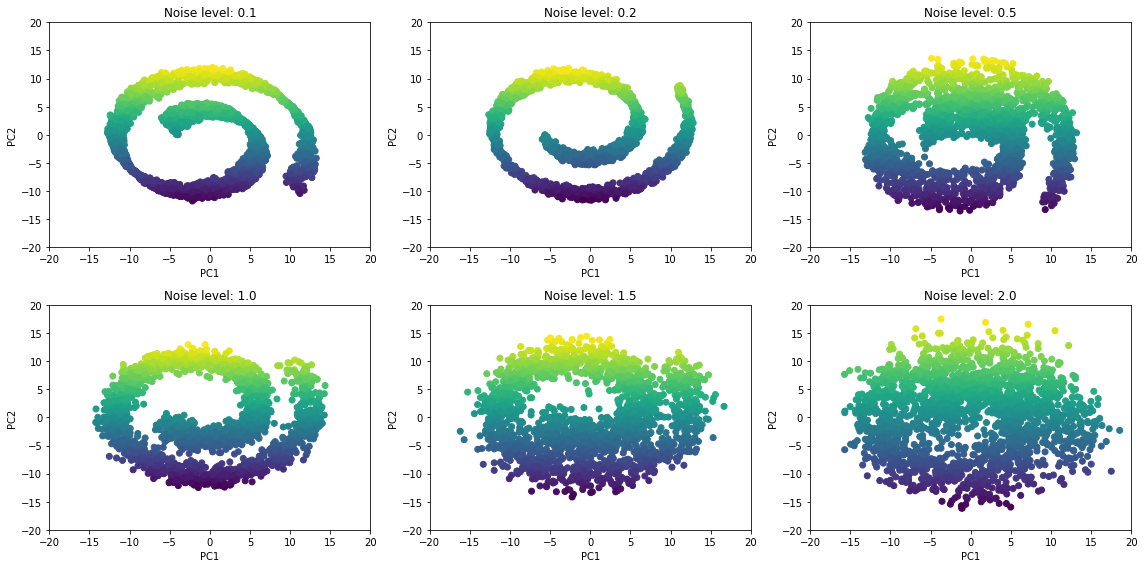

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll
import numpy as np

# Generate swiss roll datasets with different noise levels
n_samples = 2000

noise_levels = [0.1, 0.2, 0.5, 1.0, 1.5, 2.0]
datasets = [make_swiss_roll(n_samples=n_samples, noise=noise)[0] for noise in noise_levels]

# Perform PCA on each dataset
pcs = []
for dataset in datasets:
    pca = PCA(n_components=2)
    pcs.append(pca.fit_transform(dataset))

# Plot the first two principal components of each dataset
n_cols = 3
n_rows = int(np.ceil(len(pcs)/n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))
axs = axs.ravel()

for i, pc in enumerate(pcs):
    axs[i].scatter(pc[:, 0], pc[:, 1], c=pc[:, 1], cmap='viridis')
    axs[i].set_title('Noise level: {}'.format(noise_levels[i]))
    axs[i].set_xlabel('PC1')
    axs[i].set_ylabel('PC2')
    axs[i].set_xlim([-20, 20])
    axs[i].set_ylim([-20, 20])

# Remove empty subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

## PCA ON CYTOMETRY DATA

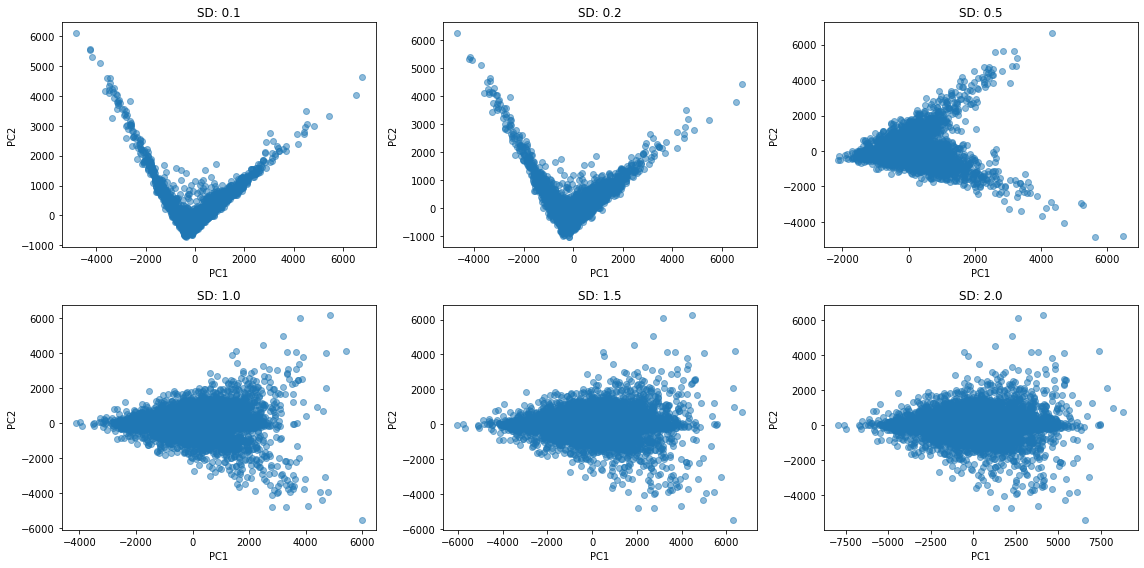

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

proteins = ["praf","pmek","plcg","PIP2","PIP3","p44/42","pakts473","PKA","PKC","P38","pjnk"]
            
file = pd.read_csv("FlowCytometryData.csv")
dataOG = file.loc[:, proteins]

prafMean=6.366118e-06
prafSD=2.475281e+02

pmekMean=-3.194519e-05
pmekSD=3.770562e+02

plcgMean=3.472676e-06
plcgSD=1.738598e+02

PIP2Mean=2.002545e-05
PIP2SD=2.993475e+02

PIP3Mean=1.352197e-06
PIP3SD=4.304816e+01

p4442SD=4.582672e+01
p4442Mean=2.158926e-06

pakts473SD=1.377662e+02
pakts473Mean=5.111974e-06

PKASD=6.444593e+02
PKAMean=-3.846262e-05

PKCSD=9.287002e+01
PKCMean=-3.486526e-06

P38SD=4.947688e+02
P38Mean=-7.795666e-06

pjnkSD=2.156606e+02
pjnkMean=-2.697562e-06

# Define function for adding Gaussian noise to the data
def gaussian_noise(x, mu, std): 
    np.random.seed(3)
    noise = np.random.normal(mu, std, size=x.shape) 
    x_noisy = x + noise 
    return x_noisy 

# Add noise to the original data for each standard deviation level
noise_levels = [0.1, 0.2, 0.5, 1.0, 1.5, 2.0]
datasets = [dataOG.copy() for i in range(len(noise_levels))]
for i, sd in enumerate(noise_levels):
    datasets[i].praf = gaussian_noise(datasets[i].praf, prafMean, prafSD*sd)
    datasets[i].pmek = gaussian_noise(datasets[i].pmek, pmekMean, pmekSD*sd)
    datasets[i].plcg = gaussian_noise(datasets[i].plcg, plcgMean, plcgSD*sd)
    datasets[i].PIP2 = gaussian_noise(datasets[i].PIP2, PIP2Mean, PIP2SD*sd)
    datasets[i].PIP3 = gaussian_noise(datasets[i].PIP3, PIP3Mean, PIP3SD*sd)
    datasets[i].iloc[:,[5]] = gaussian_noise(datasets[i].iloc[:,[5]], p4442Mean, p4442SD*sd)
    datasets[i].pakts473 = gaussian_noise(datasets[i].pakts473, pakts473Mean, pakts473SD*sd)
    datasets[i].PKA = gaussian_noise(datasets[i].PKA, PKAMean, PKASD*sd)
    datasets[i].PKC = gaussian_noise(datasets[i].PKC, PKCMean, PKCSD*sd)
    datasets[i].P38 = gaussian_noise(datasets[i].P38, P38Mean, P38SD*sd)
    datasets[i].pjnk = gaussian_noise(datasets[i].pjnk, pjnkMean, pjnkSD*sd)

# Perform PCA on each dataset
pcs = []
for dataset in datasets:
    pca = PCA(n_components=2)
    pcs.append(pca.fit_transform(dataset))

# Plot the first two principal components of each dataset
n_cols = 3
n_rows = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))
axs = axs.ravel()
for i, pc in enumerate(pcs):
    axs[i].scatter(pc[:, 0], pc[:, 1], alpha=0.5)
    axs[i].set_title('SD: {}'.format(noise_levels[i]))
    axs[i].set_xlabel('PC1')
    axs[i].set_ylabel('PC2')
    if i == 2:
        break
for j, pc in enumerate(pcs[3:]):
    axs[j+3].scatter(pc[:, 0], pc[:, 1], alpha=0.5)
    axs[j+3].set_title('SD: {}'.format(noise_levels[j+3]))
    axs[j+3].set_xlabel('PC1')
    axs[j+3].set_ylabel('PC2')
    if j == 2:
        break
                        

plt.tight_layout()
plt.show()


## T-SNE ON SWISS ROLL

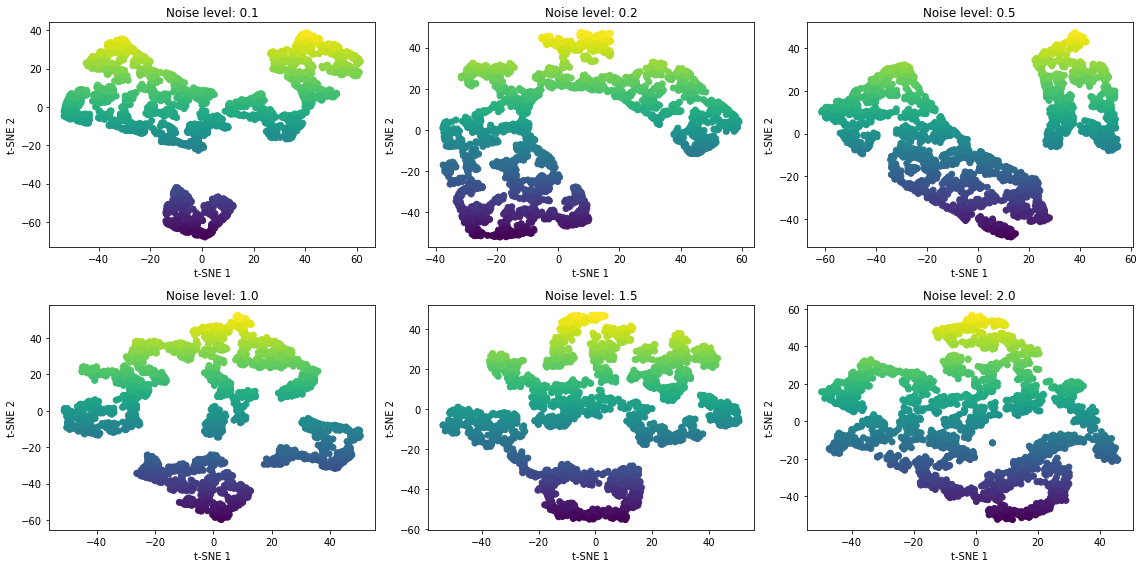

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_swiss_roll
import numpy as np

# Generate swiss roll datasets with different noise levels
n_samples = 2000
noise_levels = [0.1, 0.2, 0.5, 1.0, 1.5, 2.0]
datasets = [make_swiss_roll(n_samples=n_samples, noise=noise)[0] for noise in noise_levels]

# Perform t-SNE on each dataset
tsnes = []
for dataset in datasets:
    tsne = TSNE(n_components=2, learning_rate=500, random_state=80, perplexity=35)
    tsnes.append(tsne.fit_transform(dataset))

# Plot the t-SNE results of each dataset
n_cols = 3
n_rows = int(np.ceil(len(tsnes)/n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))
axs = axs.ravel()

for i, tsne in enumerate(tsnes):
    axs[i].scatter(tsne[:, 0], tsne[:, 1], c=tsne[:, 1], cmap='viridis')
    axs[i].set_title('Noise level: {}'.format(noise_levels[i]))
    axs[i].set_xlabel('t-SNE 1')
    axs[i].set_ylabel('t-SNE 2')
    
# Remove empty subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


## T-SNE ON CYTOMETRY DATA

In [ ]:
# Load the data for TNSE
dataOG = file.loc[:, proteins]

# Add noise to the original data for each standard deviation level
noise_levels = [0.1, 0.2, 0.5, 1.0, 1.5, 2.0]
datasets = [dataOG.copy() for i in range(len(noise_levels))]
for i, sd in enumerate(noise_levels):
    datasets[i] += np.random.normal(0, sd, datasets[i].shape)

# Perform TNSE on each dataset
tnses = []
for dataset in datasets:
    tnse = TSNE(n_components=2, learning_rate=500, random_state=80, perplexity=35)
    tnse.fit_transform(dataset)
    tnses.append(tnse.embedding_)

# Plot the first two components of each dataset
n_cols = 3
n_rows = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))
axs = axs.ravel()
for i, tnse in enumerate(tnses):
    axs[i].scatter(tnse[:, 0], tnse[:, 1], alpha=0.5)
    axs[i].set_title('SD: {}'.format(noise_levels[i]))
    axs[i].set_xlabel('TNSE 1')
    axs[i].set_ylabel('TNSE 2')
    if i == 2:
        break
for j, tnse in enumerate(tnses[3:]):
    axs[j+3].scatter(tnse[:, 0], tnse[:, 1], alpha=0.5)
    axs[j+3].set_title('SD: {}'.format(noise_levels[j+3]))
    axs[j+3].set_xlabel('TNSE 1')
    axs[j+3].set_ylabel('TNSE 2')
    if j == 2:
        break

plt.tight_layout()
plt.show()

